In [20]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [21]:
df_ori = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

# EDA

In [22]:
df_ori.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.00,Mobile Phone,3,6.00,Debit Card,Female,3.00,3,Laptop & Accessory,2,Single,9,1,11.00,1.00,1.00,5.00,159.93
1,50002,1,NaN,Phone,1,8.00,UPI,Male,3.00,4,Mobile,3,Single,7,1,15.00,0.00,1.00,0.00,120.90
2,50003,1,NaN,Phone,1,30.00,Debit Card,Male,2.00,4,Mobile,3,Single,6,1,14.00,0.00,1.00,3.00,120.28
3,50004,1,0.00,Phone,3,15.00,Debit Card,Male,2.00,4,Laptop & Accessory,5,Single,8,0,23.00,0.00,1.00,3.00,134.07
4,50005,1,0.00,Phone,1,12.00,CC,Male,NaN,3,Mobile,5,Single,3,0,11.00,1.00,1.00,3.00,129.60


In [23]:
# CustomerID unique count
df_ori.CustomerID.nunique()

5630

1. Check Missing Value

In [24]:
# def check missing values (percentage)
def missing_values(df):
    total_missing = df.isnull().sum()
    percent = round(total_missing / len(df) * 100, 2)
    d_type = df.dtypes
    return pd.concat([d_type, total_missing, percent], axis=1, keys=['Type', 'Total', 'Percent'])


missing_values(df_ori)

,Type,Total,Percent
CustomerID,int64,0,0.00
Churn,int64,0,0.00
Tenure,float64,264,4.69
PreferredLoginDevice,object,0,0.00
CityTier,int64,0,0.00
WarehouseToHome,float64,251,4.46
PreferredPaymentMode,object,0,0.00
Gender,object,0,0.00
HourSpendOnApp,float64,255,4.53
NumberOfDeviceRegistered,int64,0,0.00


In [25]:
# customerID to index
df_ori.set_index('CustomerID', inplace=True)
df_ori.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
50001,1,4.00,Mobile Phone,3,6.00,Debit Card,Female,3.00,3,Laptop & Accessory,2,Single,9,1,11.00,1.00,1.00,5.00,159.93
50002,1,NaN,Phone,1,8.00,UPI,Male,3.00,4,Mobile,3,Single,7,1,15.00,0.00,1.00,0.00,120.90
50003,1,NaN,Phone,1,30.00,Debit Card,Male,2.00,4,Mobile,3,Single,6,1,14.00,0.00,1.00,3.00,120.28
50004,1,0.00,Phone,3,15.00,Debit Card,Male,2.00,4,Laptop & Accessory,5,Single,8,0,23.00,0.00,1.00,3.00,134.07
50005,1,0.00,Phone,1,12.00,CC,Male,NaN,3,Mobile,5,Single,3,0,11.00,1.00,1.00,3.00,129.60


2. Visualization

In [26]:
def visualize_data(data, target_column):
    # # drop columns CustomerID
    # data = data.drop(['CustomerID'], axis=1)
    for column in data.columns:
        if column == target_column:
            pass
        else:
            if data[column].dtype == 'int64' or data[column].dtype == 'float64':
                fig = px.box(data, x=target_column, y=column)
                fig.show()
            elif data[column].dtype == 'object':
                cross_tab = pd.crosstab(data[column], data[target_column])
                fig = px.imshow(cross_tab.values, labels=dict(x=column, y=target_column))
                fig.show()

visualize_data(df_ori, 'Churn')

# Label Encoder

In [27]:
# lable encoding for all categorical features in train_df
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_ori.columns:
    if df_ori[col].dtype == 'object':
        df_ori[col] = le.fit_transform(df_ori[col])
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 50001 to 55630
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   int32  
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   int32  
 6   Gender                       5630 non-null   int32  
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   int32  
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   int32  
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain     

# Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
X = df_ori.drop(['Churn'], axis=1)
y = df_ori['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df_ori['Churn'])
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0   0.83
1   0.17
Name: Churn, dtype: float64
0   0.83
1   0.17
Name: Churn, dtype: float64


# Impute Missing Value

In [29]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=42)
X_train = pd.DataFrame(imp.fit_transform(X_train))
X_test = pd.DataFrame(imp.transform(X_test))

# Handle Imbalanced Data

In [30]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_train_res))


Original dataset shape Counter({0: 3746, 1: 758})
Resampled dataset shape Counter({0: 3746, 1: 3746})


# Transform Data to make data more Gaussian-like.

In [31]:
# def normal distribution test
def normality_test(df):
    from scipy.stats import shapiro
    for col in df.columns:
        stat, p = shapiro(df[col]) # shapiro test
        if p <= 0.05:
            print(f'===== {col} =====')
            print('Statistics=%.3f, p=%.3f' % (stat, p))
            print('Probably not Gaussian')

normality_test(X_train_res)


===== 0 =====
Statistics=0.836, p=0.000
Probably not Gaussian
===== 1 =====
Statistics=0.844, p=0.000
Probably not Gaussian
===== 2 =====
Statistics=0.690, p=0.000
Probably not Gaussian
===== 3 =====
Statistics=0.894, p=0.000
Probably not Gaussian
===== 4 =====
Statistics=0.910, p=0.000
Probably not Gaussian
===== 5 =====
Statistics=0.674, p=0.000
Probably not Gaussian
===== 6 =====
Statistics=0.876, p=0.000
Probably not Gaussian
===== 7 =====
Statistics=0.924, p=0.000
Probably not Gaussian
===== 8 =====
Statistics=0.906, p=0.000
Probably not Gaussian
===== 9 =====
Statistics=0.910, p=0.000
Probably not Gaussian
===== 10 =====
Statistics=0.838, p=0.000
Probably not Gaussian
===== 11 =====
Statistics=0.886, p=0.000
Probably not Gaussian
===== 12 =====
Statistics=0.681, p=0.000
Probably not Gaussian
===== 13 =====
Statistics=0.917, p=0.000
Probably not Gaussian
===== 14 =====
Statistics=0.741, p=0.000
Probably not Gaussian
===== 15 =====
Statistics=0.686, p=0.000
Probably not Gaussian
==

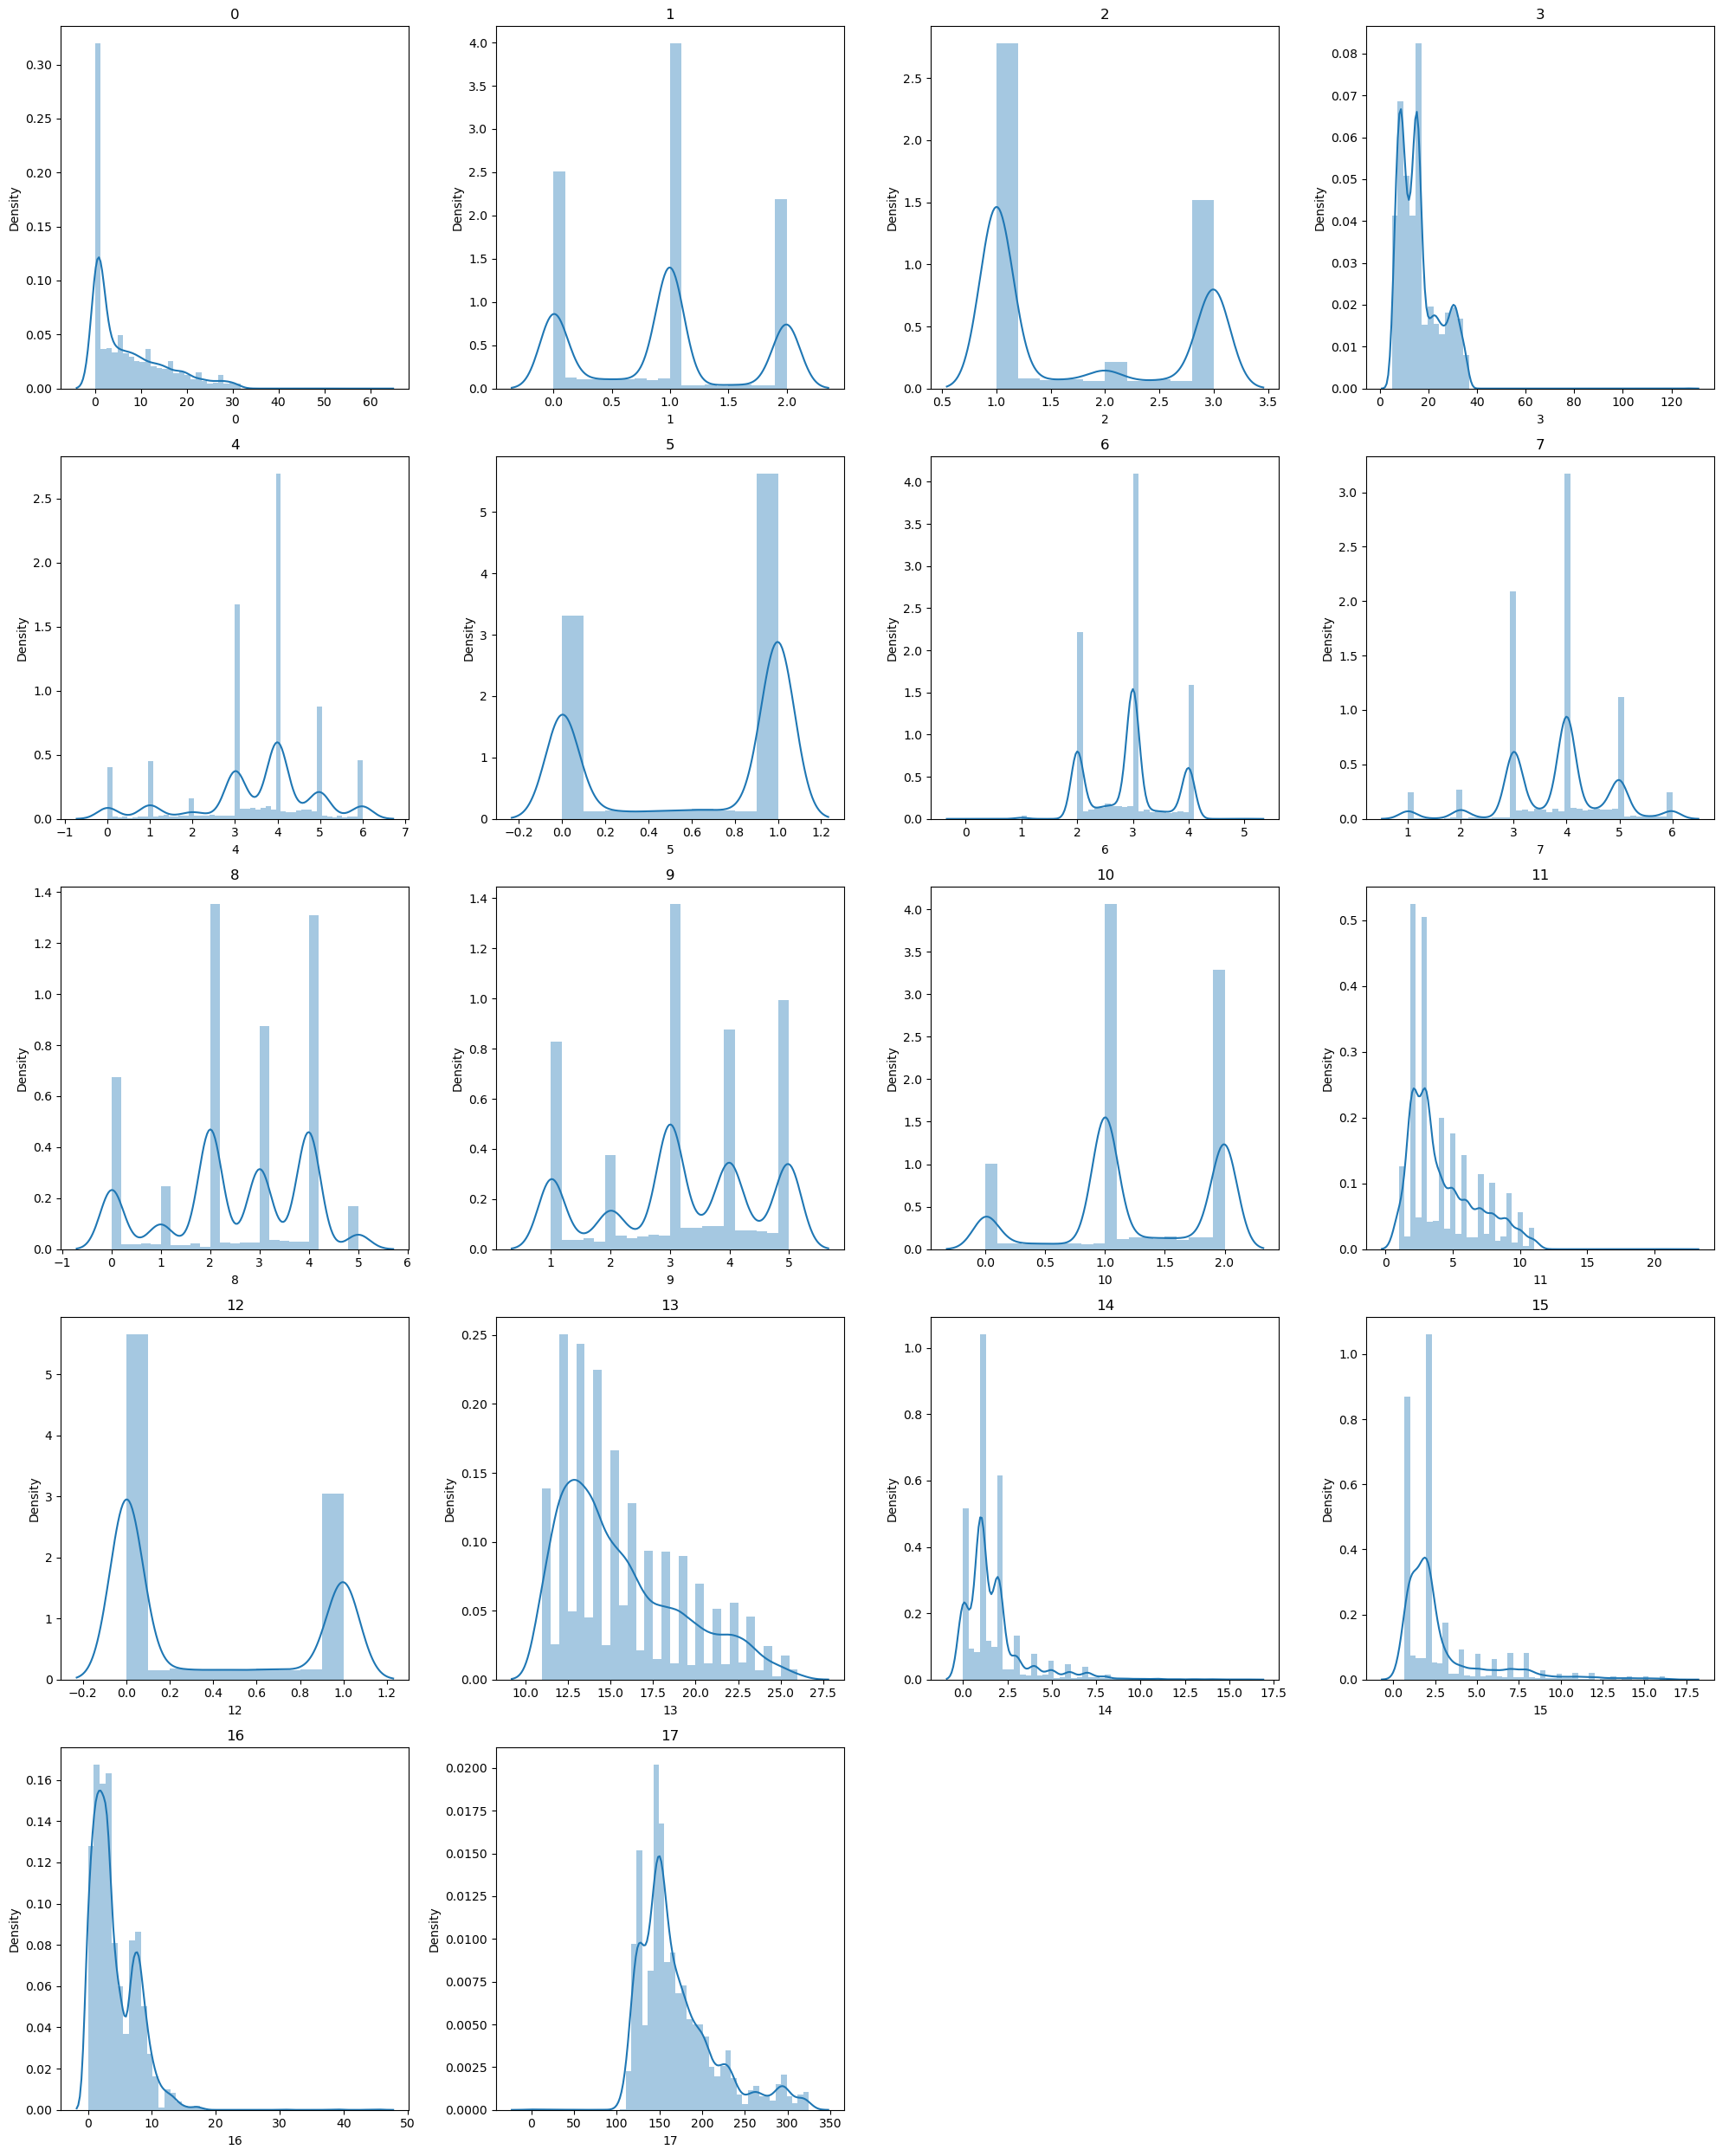

In [32]:
def distribution_plot(df):
    num_cols = len(df.columns)
    num_rows = (num_cols + 3) // 4  # Calculate the number of rows based on the number of columns
    
    fig, ax = plt.subplots(num_rows, 4, figsize=(20, 5*num_rows))
    for i, col in enumerate(df.columns):
        sns.distplot(df[col], ax=ax[i//4, i%4])
        ax[i//4, i%4].set_title(col)
    
    # Remove any unused subplots
    if num_cols < num_rows * 4:
        for j in range(num_cols % 4, 4):
            fig.delaxes(ax[num_rows-1, j])
    
    plt.tight_layout()
    plt.show()

distribution_plot(X_train_res)

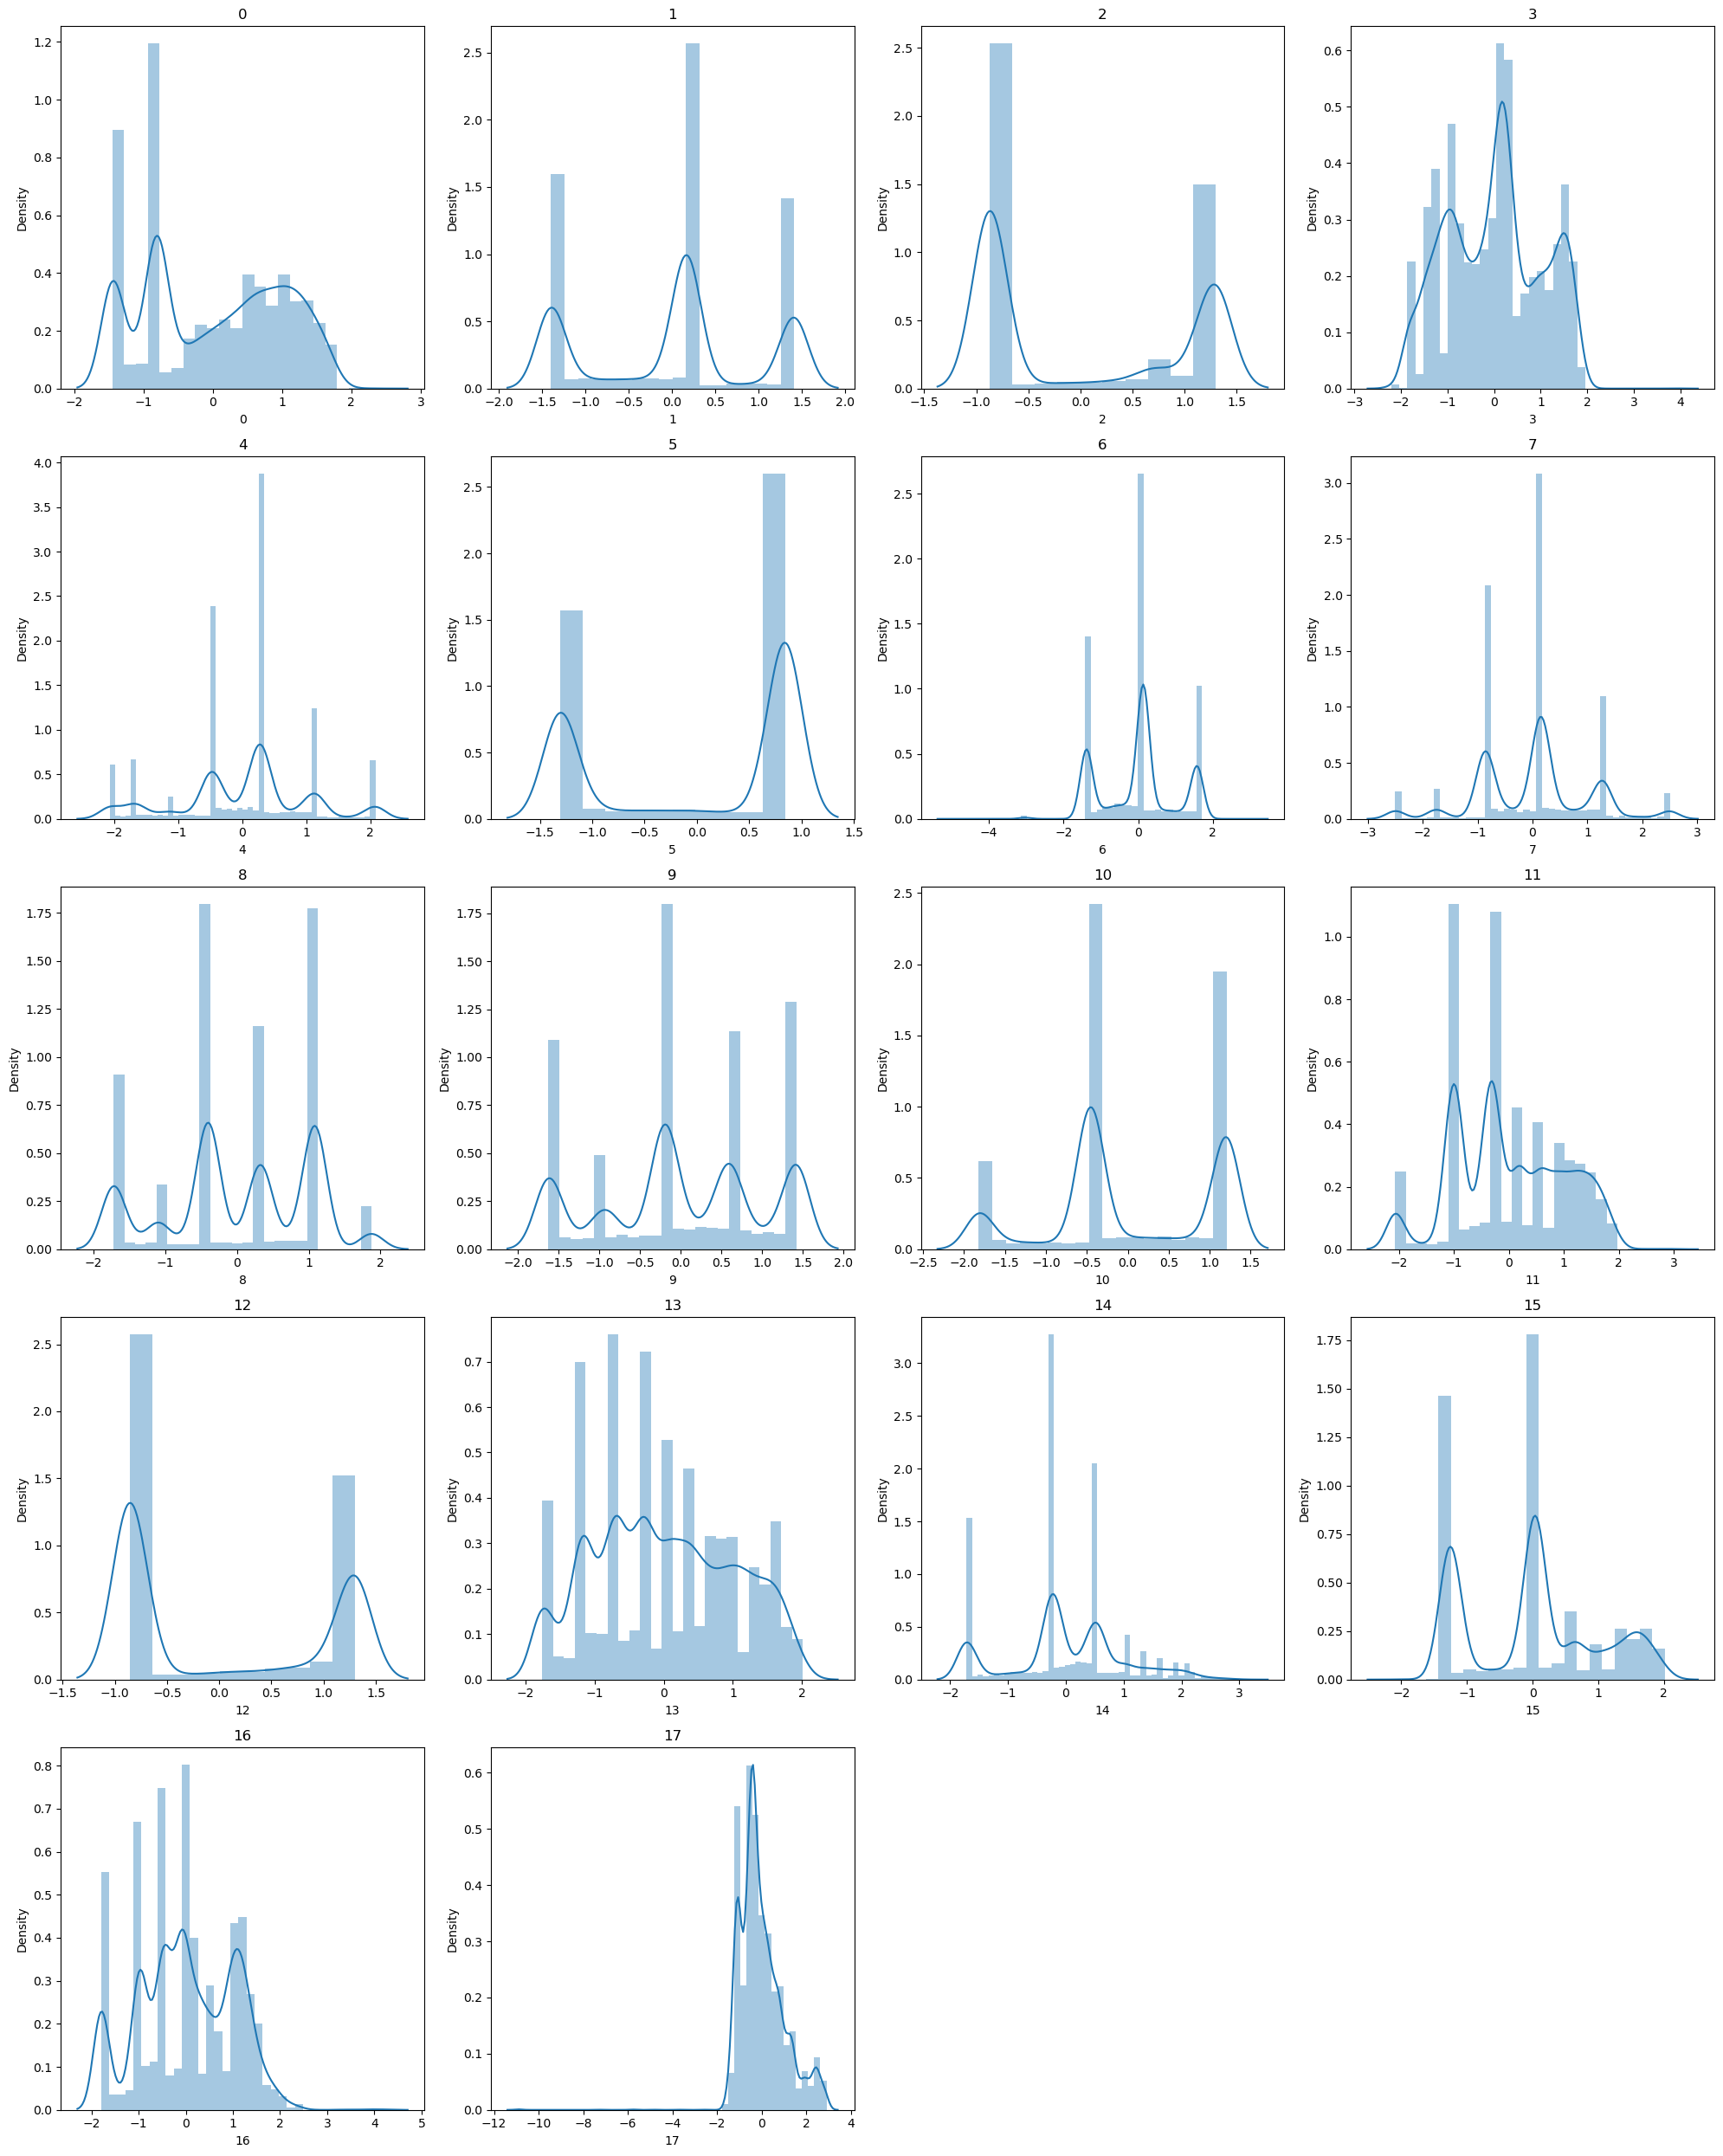

In [33]:
# power transform 
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer() #default=’yeo-johnson’
X_train_res = pd.DataFrame(pt.fit_transform(X_train_res))
X_test = pd.DataFrame(pt.transform(X_test))

distribution_plot(X_train_res)


# Feature Selection

In [34]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=42) 
boruta_selector.fit(np.array(X_train_res), np.array(y_train_res))

# check selected features
print("Selected Features: ", boruta_selector.support_) # check selected features
print("Ranking: ",boruta_selector.ranking_) # check ranking of features
print("No. of significant features: ", boruta_selector.n_features_)

X_train_filtered = boruta_selector.transform(np.array(X_train_res))
X_test_filtered = boruta_selector.transform(np.array(X_test))



Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	18
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	18
Tentative: 	0
Rejected: 	0
Selected Features:  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
Ranking:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
No. of significant features:  18


# Model Screening

In [35]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_filtered, X_test_filtered, y_train_res, y_test)
models

100%|██████████| 29/29 [00:13<00:00,  2.11it/s]

[LightGBM] [Info] Number of positive: 3746, number of negative: 3746
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4579
[LightGBM] [Info] Number of data points in the train set: 7492, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.99,0.98,0.98,0.99,0.31
RandomForestClassifier,0.98,0.97,0.97,0.98,1.01
ExtraTreesClassifier,0.98,0.97,0.97,0.98,0.52
LabelPropagation,0.97,0.96,0.96,0.97,2.43
LabelSpreading,0.97,0.96,0.96,0.97,2.92
LGBMClassifier,0.98,0.95,0.95,0.98,0.12
KNeighborsClassifier,0.89,0.93,0.93,0.90,0.05
DecisionTreeClassifier,0.95,0.92,0.92,0.95,0.05
BaggingClassifier,0.96,0.92,0.92,0.96,0.34


# XGBClassifier

In [36]:
# model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc

In [37]:
#Create Generic function to fit data and display results/predictions
def fit_evaluate(clf, X_train, X_test, y_train, y_test):
    # fit model to training data
    clf.fit(X_train, y_train)

    # make predictions for train data
    y_pred_train = clf.predict(X_train)

    # make predictions for test data
    y_pred_test = clf.predict(X_test)
    # print evaluation
    print(classification_report(y_test, y_pred_test))
    print('\nConfusion Matrix: \n')
    s = sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='g', cmap='YlGnBu');
    s.set(xlabel='Predicted class', ylabel='True class')
    plt.show()

    fpr_train, tpr_train, _ = roc_curve(y_pred_train,  y_train)
    auc_train = roc_auc_score(y_pred_train, y_train)
    plt.plot(fpr_train,tpr_train, color='Blue', label='train: auc='+f'{auc_train:.2f}')

    fpr_test, tpr_test, _ = roc_curve(y_pred_test,  y_test)
    auc_test = roc_auc_score(y_pred_test, y_test)
    plt.plot(fpr_test,tpr_test, color='Red', label='test: auc='+f'{auc_test:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.legend(loc=4)
    plt.show()

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       936
           1       0.98      0.96      0.97       190

    accuracy                           0.99      1126
   macro avg       0.99      0.98      0.98      1126
weighted avg       0.99      0.99      0.99      1126


Confusion Matrix: 



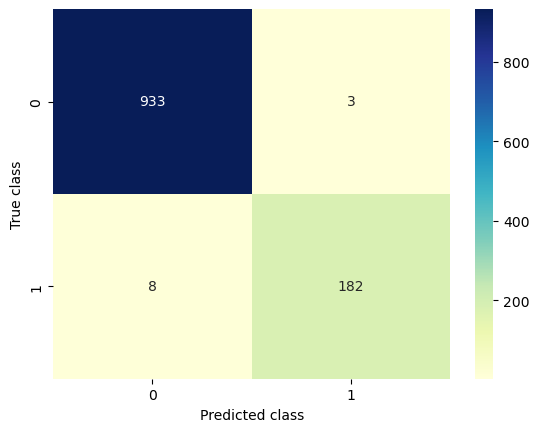

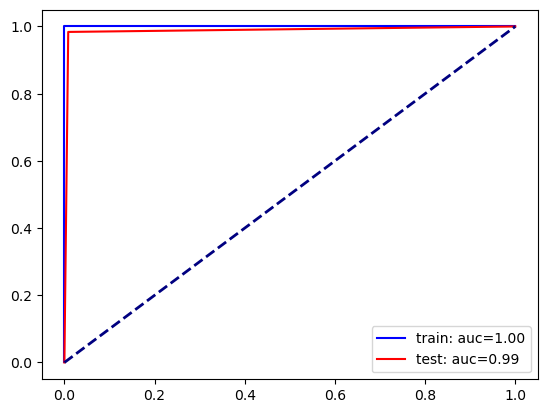

In [38]:
# XGBClassifier
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_filtered, y_train_res)
y_pred = xgb.predict(X_test_filtered)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

fit_evaluate(xgb, X_train_filtered, X_test_filtered, y_train_res, y_test)